In [1]:
import pandas as pd
import re 
import json
import ast


In [2]:
# load ted.csv into a Datafarme
df_ted = pd.read_csv('ted_main.csv')
#df_ted.head(5)


In [3]:
#
df_ted['ratings'] = df_ted['ratings'].apply(lambda x: ast.literal_eval(x))

In [4]:
# iterate in rows and sum funny rating 
# append to each rows in col 'funny_count'
df_ted['funny_count'] = 0

for i in range(0,2550):
    funny_rating = 0
    for j in range(0,14):
        funny_id = df_ted['ratings'][i][j].get('id')
        if funny_id == 7:
            funny_rating = funny_rating + df_ted['ratings'][i][j].get('count')      
    df_ted.loc[(i, 'funny_count')] = funny_rating

### Funny  Factor
#### Funny_fact = count(funny) + count(laghter)/2

In [5]:
# load transcripts file into a dataframe
df_trans = pd.read_csv('D:/Data ScienceBI/Year-II/sem-I/Big Data Analysis/Project/ted-talks/transcripts.csv')

In [6]:
# create  a new column 'loughter' with value equals zero and append to trans datfarame
df_trans['loughter'] = 0

In [7]:
# Find duplicated rows 
# 3 rows 
duplicate_rows = df_trans[df_trans.duplicated()]
duplicate_rows

,transcript,url,loughter
1114,I have a question for you: Are you religious? ...,https://www.ted.com/talks/jonathan_haidt_human...,0
1115,The recent debate over copyright laws like SOP...,https://www.ted.com/talks/rob_reid_the_8_billi...,0
1116,I'm going to tell you a little bit about my TE...,https://www.ted.com/talks/brene_brown_listenin...,0


In [8]:
# Drop duplicates 
df_trans.drop_duplicates(keep = False,inplace = True)
#df_trans

In [9]:
# Check if the duplicates are removed 
drows = df_trans[df_trans.duplicated()]
drows

,transcript,url,loughter


In [10]:
# re_assign index after droping dupliacte rows 
df_trans.index = range(0,len(df_trans))
#df_trans.head()

In [11]:
#iterate in each row and sum frequency of the word 'Laughter'
#append the value to 'loughter' col
import re 
word = 'Laughter'
for i in range(0,2461):
    count = 0
    input_tedtalk = df_trans['transcript'][i] 
    count = count + sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(word), input_tedtalk))
    df_trans.loc[(i,'loughter')] = count

In [12]:
df_trans.head(5)

,transcript,url,loughter
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,39
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,22
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,38
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...,10
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,10


## Popularity Factor
### PF = (commnets + views + rating )/ 3

In [13]:
df_ted['ratings_count'] = 0

for i in range(2550):
    cnt = 0
    for rev in range(0, 14):
        cnt = cnt + df_ted['ratings'][i][rev].get('count')
    df_ted.loc[(i, 'ratings_count')] = cnt

#### Min-Max Scaling

In [14]:
# scale 'ratings', 'views' and 'comments '
df_ted['ratings_nbr_sc'] = ( df_ted['ratings_count'] - df_ted['ratings_count'].min() ) / ( df_ted['ratings_count'].max() - df_ted['ratings_count'].min() )
df_ted['comm_sc'] = ( df_ted['comments'] - df_ted['comments'].min() ) / ( df_ted['comments'].max() - df_ted['comments'].min() )
df_ted['views_sc'] = ( df_ted['views'] - df_ted['views'].min() ) / ( df_ted['views'].max() - df_ted['views'].min() )

In [15]:
# compute popularity factor 
df_ted['popularity'] = ( df_ted['views_sc'] + df_ted['comm_sc'] + df_ted['ratings_nbr_sc']) / 3

In [16]:
df_ted.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,tags,title,url,views,funny_count,ratings_count,ratings_nbr_sc,comm_sc,views_sc,popularity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,19645,93850,1.000000,0.710872,1.000000,0.903624
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,544,2936,0.030582,0.041081,0.066772,0.046145
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,964,2824,0.029387,0.019057,0.033615,0.027353
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,59,3728,0.039027,0.030928,0.034914,0.034956
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,1390,25620,0.272462,0.092315,0.253418,0.206065


## Min-Max Scaling
### x to y= (x-min)/(max-min)

In [17]:
#  frequency of funny 
mini = df_ted['funny_count'].min()
maxi = df_ted['funny_count'].max()
df_ted['Scaled_fcount']  = ((df_ted['funny_count'] - mini) / (maxi - mini))
# frequency of loughter 
min_lough = df_trans['loughter'].min()
max_lough = df_trans['loughter'].max()
df_trans['Scaled_lough']  = (df_trans['loughter'] - min_lough) / (max_lough - min_lough)
df_trans['Scaled_lough'].head(5)


0    0.527027
1    0.297297
2    0.513514
3    0.135135
4    0.135135
Name: Scaled_lough, dtype: float64

In [18]:
df_ted['Scaled_fcount'].head(5)

0    1.000000
1    0.027692
2    0.049071
3    0.003003
4    0.070756
Name: Scaled_fcount, dtype: float64

In [19]:
# Merge the two datafarmes on column = url (inner join) and return a DataFrame 'lough_funny'
lough_funny = pd.merge(df_ted,df_trans, on = 'url', how='inner')

In [20]:
lough_funny.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,funny_count,ratings_count,ratings_nbr_sc,comm_sc,views_sc,popularity,Scaled_fcount,transcript,loughter,Scaled_lough
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,19645,93850,1.000000,0.710872,1.000000,0.903624,1.000000,Good morning. How are you?(Laughter)It's been ...,39,0.527027
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,544,2936,0.030582,0.041081,0.066772,0.046145,0.027692,"Thank you so much, Chris. And it's truly a gre...",22,0.297297


In [21]:
# create a new DataFarme with two coulums, i.e Scaled_fcount, Scaled_lough, popularity
df = lough_funny[['published_date','Scaled_fcount', 'Scaled_lough','popularity']]

In [22]:
#  compute for each record funny_factor , Funny_factor = (funny_count + frequency_of_laughter)/2
df['funny_factor'] = (df['Scaled_fcount'] + df['Scaled_lough'])/2

C:\Users\pc-hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
df.head(3)

,published_date,Scaled_fcount,Scaled_lough,popularity,funny_factor
0,1151367060,1.000000,0.527027,0.903624,0.763514
1,1151367060,0.027692,0.297297,0.046145,0.162494
2,1151367060,0.049071,0.513514,0.027353,0.281292


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2461 entries, 0 to 2460
Data columns (total 5 columns):
published_date    2461 non-null int64
Scaled_fcount     2461 non-null float64
Scaled_lough      2461 non-null float64
popularity        2461 non-null float64
funny_factor      2461 non-null float64
dtypes: float64(4), int64(1)
memory usage: 115.4 KB


## Correlation Analysis
#### Compute Pearson correlation coefficent for evey numeric feature  

In [25]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [26]:
# create new data frame with numeric features and perfom Min_Max scaling
# merge popularity, funny_factor and published date with the scaled features
df_features = lough_funny[['comments','duration','languages', 'num_speaker','views','funny_count','loughter','ratings_count']]
sclar = MinMaxScaler()
df_scaled = sclar.fit_transform(df_features)
df_corr = pd.DataFrame(df_scaled, columns = ['comments','duration','languages', 'num_speaker','views','funny_count','loughter','ratings_count'])
df_corr['popularity'] = df['popularity']
df_corr['funny_factor'] = df['funny_factor']
df_corr['published_date'] = df['published_date']
df_corr.head(3)

,comments,duration,languages,num_speaker,views,funny_count,loughter,ratings_count,popularity,funny_factor,published_date
0,0.710872,0.296286,0.830986,0.0,1.000000,1.000000,0.527027,1.000000,0.903624,0.763514,1151367060
1,0.041081,0.242442,0.591549,0.0,0.064681,0.027692,0.297297,0.030582,0.046145,0.162494,1151367060
2,0.019057,0.331414,0.352113,0.0,0.031450,0.049071,0.513514,0.029387,0.027353,0.281292,1151367060


In [27]:
# Convert a timestamp 'published_date' value into date object then convert the value to the corresponding weekday
from datetime import datetime
import calendar 
df_corr['Published_day'] = df_corr['published_date'].apply(lambda x: datetime.fromtimestamp(x).strftime('%m/%d/%Y'))
df_corr['Pweek_day']= (pd.to_datetime(df_corr['Published_day'])).apply(lambda d: calendar.day_name[d.weekday()])

In [28]:
dfcorr_copy = df_corr.copy()
dfcorr_copy.drop(['published_date','Published_day', 'Pweek_day'], axis = 1, inplace = True)
dfcorr_copy.head(2)

,comments,duration,languages,num_speaker,views,funny_count,loughter,ratings_count,popularity,funny_factor
0,0.710872,0.296286,0.830986,0.0,1.000000,1.000000,0.527027,1.000000,0.903624,0.763514
1,0.041081,0.242442,0.591549,0.0,0.064681,0.027692,0.297297,0.030582,0.046145,0.162494


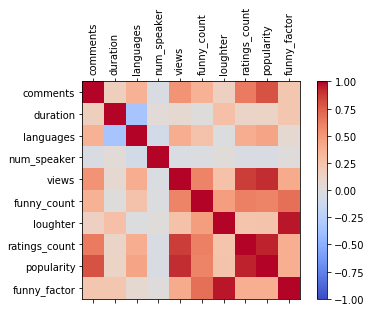

In [29]:
# Compute Pearson correlation for each pair of features
# pair wise correlation matrix, the darker the color, higher the correlation, 
# dark brown postively indcate +ve corrlation and dark blue -ve correlation 
correlation = dfcorr_copy.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dfcorr_copy.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfcorr_copy.columns)
ax.set_yticklabels(dfcorr_copy.columns)
plt.show()

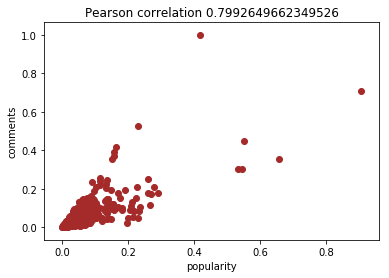

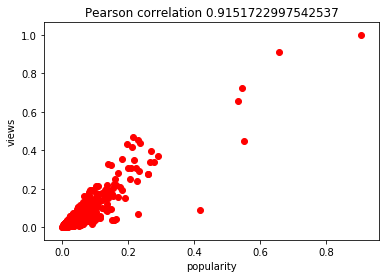

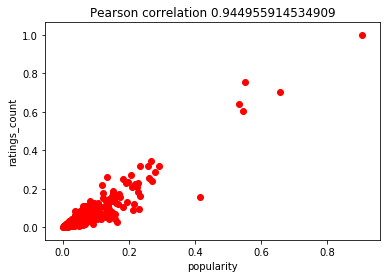

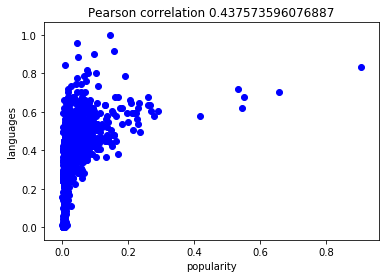

In [30]:
# function to plot a scatter plot for column in X , on x-axis with column Y , on y=axis
import random
X = ['popularity']
Y = ['comments','views','ratings_count','languages']
colors = ['red','black','blue','green','yellow','brown']
#fig, axs = plt.subplots(4, 3,figsize=(20,30))
def scatter_plotter(X,Y):
    for x in X:
        for y in Y:
            if x == y:
                pass
            else:
                pcor = 0 
                #ax1= fig.add_subplot(2,2,i)
                plt.scatter(dfcorr_copy[x],dfcorr_copy[y], c= random.choice(colors),marker="o")
                pcor = dfcorr_copy[x].corr(dfcorr_copy[y])
                plt.title('Pearson correlation {0}'.format(pcor))
                plt.xlabel(x)
                plt.ylabel(y)
                plt.show()
scatter_plotter(X,Y)    

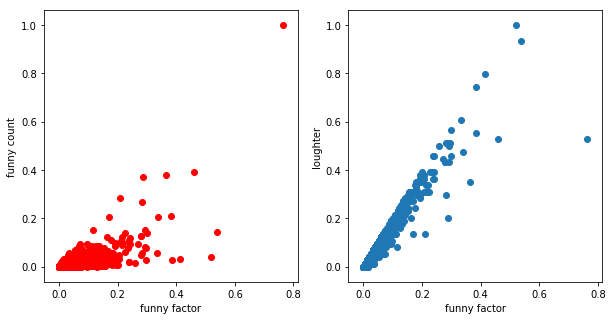

In [31]:
fig, (ax1,ax2) = plt.subplots(ncols= 2,figsize=(10,5))
# funny count vs funny factor scatter plot
ax1.scatter(dfcorr_copy['funny_factor'], dfcorr_copy['funny_count'], c= 'r')
ax1.set_xlabel('funny factor')
ax1.set_ylabel('funny count')
# funny factor vs loughter sactter plot
ax2.scatter(dfcorr_copy['funny_factor'], dfcorr_copy['loughter'])
ax2.set_xlabel('funny factor')
ax2.set_ylabel('loughter')
plt.show()

In [32]:
df_corr.head(3)

,comments,duration,languages,num_speaker,views,funny_count,loughter,ratings_count,popularity,funny_factor,published_date,Published_day,Pweek_day
0,0.710872,0.296286,0.830986,0.0,1.000000,1.000000,0.527027,1.000000,0.903624,0.763514,1151367060,06/27/2006,Tuesday
1,0.041081,0.242442,0.591549,0.0,0.064681,0.027692,0.297297,0.030582,0.046145,0.162494,1151367060,06/27/2006,Tuesday
2,0.019057,0.331414,0.352113,0.0,0.031450,0.049071,0.513514,0.029387,0.027353,0.281292,1151367060,06/27/2006,Tuesday


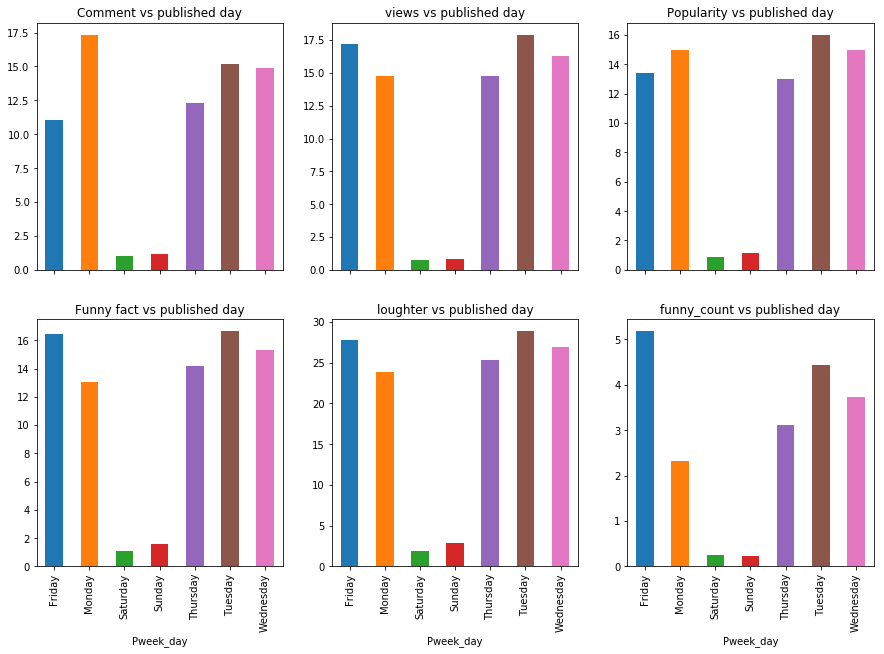

In [33]:
# Plot bar graph for publication_day vs comments, views, popularity,
#funny_factor,loughter,funny_coutnt repsectively
fig  = plt.figure()
#fig.subplots_adjust(hspace=.5)
plt.subplot(2,3,1)
x1 =df_corr.groupby(['Pweek_day'])['comments'].sum().plot(kind= 'bar',figsize=(15,10),title="Comment vs published day",sharex = True)
plt.subplot(2,3,2)
x2 = df_corr.groupby(['Pweek_day'])['views'].sum().plot(kind = 'bar',figsize=(15,10),title="views vs published day", sharex = True)
plt.subplot(2,3,3)
x3= df_corr.groupby(['Pweek_day'])['popularity'].sum().plot(kind='bar',figsize=(15,10),title="Popularity vs published day",sharex = True)
plt.subplot(2,3,4)
x4 = df_corr.groupby(['Pweek_day'])['funny_factor'].sum().plot(kind='bar',figsize=(15,10),title="Funny fact vs published day",sharex = True)
plt.subplot(2,3,5)
x5= df_corr.groupby(['Pweek_day'])['loughter'].sum().plot(kind='bar',figsize=(15,10),title="loughter vs published day",sharex = True)
plt.subplot(2,3,6)
x6= df_corr.groupby(['Pweek_day'])['funny_count'].sum().plot(kind='bar',figsize=(15,10),title="funny_count vs published day",sharex = True)

#plt.subplots_adjust()
plt.show()
y_labels = ['comments', 'views','popularity','funny_fact','loughter','funny_count']
i = 0
for x in [x1,x2,x3,x4,x5,x6]:
    x.set_ylabel(y_labels[i])
    i+=1


### Boxplot Analysis
###### Polt a Boxplot for all the features choosen,to analyse outliers and the range of the value.Compute 1st quantile , 3rd quantile and Inter Quantile Range column wise then values less than Q1-1.5*IQR and values greater that Q3+1.5*IQR are treated as outliers. Cout the number of outliers in each column and return total number of outliers in each column.


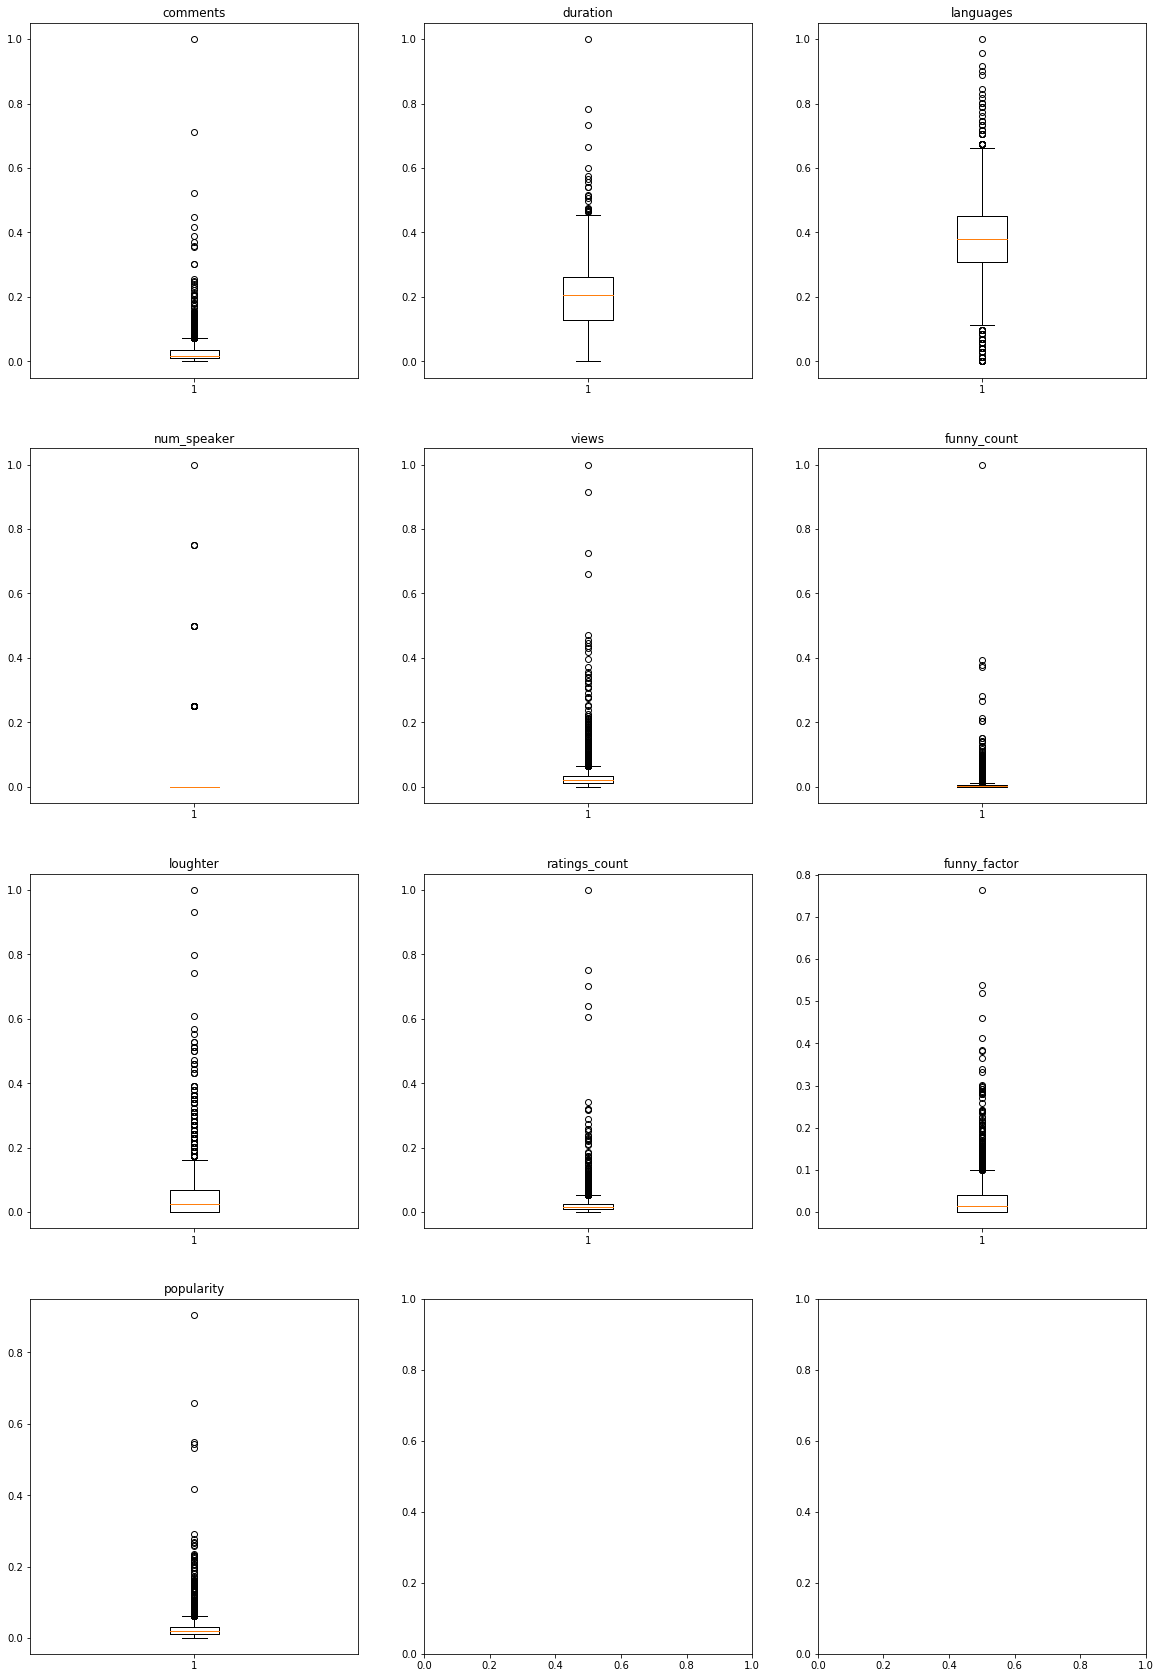

In [34]:
# Plot a boxplot for all the columns listed on colum variable 
fig, axs = plt.subplots(4, 3,figsize=(20,30))
colum = ['comments','duration','languages', 'num_speaker','views','funny_count',
         'loughter','ratings_count','funny_factor','popularity']
plot_list = list(axs.flat)
for c,a in zip(colum,plot_list):
    a.boxplot(df_corr[c])
    a.set_title(c)
    

In [35]:
# Compute first quantile(Q1), thrid Qauntile(Q3) and IQR(IRQ = Q3 -Q1) for each Column listed in variable cols
# Records with values less than Q1-1.5*IQR and values greater that Q3+1.5*IQR treat as outliers.
# Count the number of outliers for each column and return (column_name,total number of outliers)

cols = ['views','popularity','comments','funny_count','ratings_count','funny_factor','loughter']
outdict = {}
def count_outlier():
    for i in cols:
        Q1 = df_corr[i].quantile(0.25)
        Q3 = df_corr[i].quantile(0.75)
        IQR = Q3 - Q1
        no_outlier = (df_corr[(df_corr[i] < Q1-1.5*IQR ) | (df_corr[i] > Q3+1.5*IQR)][i]).count()
        outdict[i]= no_outlier
    return ([(col_name,val)for col_name , val in outdict.items()])       
count_outlier()

[('views', 239),
 ('popularity', 228),
 ('comments', 195),
 ('funny_count', 366),
 ('ratings_count', 230),
 ('funny_factor', 164),
 ('loughter', 183)]